# Introduction
In this work, we design a prediction model, that predicts whether a patient has heart problems(disease) or not, based on certain diagnostic measurements included in the dataset,
and explore various techniques to boost performance and accuracy.


#### About Dataset
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them.    
The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

#### About Attributes
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

# Overview
1. Loading Important Libraries
2. Reading dataset and examine basic prorperties
3. Complete EDA
4. Feature Engineering
5. Model Building and Hyperparameter Tuning

In [1]:
## Imporing Libraries

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-dataset/heart.csv


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
# Get the data
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
#Shape
df.shape

(1025, 14)

In [9]:
#All columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# EDA

In [10]:
# Get some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
#Getting descriptive analysis of features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Univariant Analysis
Analysing each feature seperatly

**Let's go through our target.**

In [17]:
# finding the number of classes
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [18]:
# Analysing target feature in percentage
df["target"].value_counts(normalize=True) * 100

1    51.317073
0    48.682927
Name: target, dtype: float64

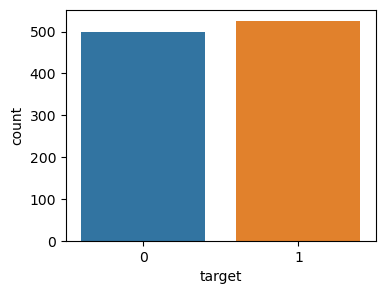

In [19]:
# ploting count plot 
plt.figure(figsize=(4,3))
sns.countplot(x=df["target"], data=df)
plt.show()

In [22]:
# using group by function to find the relationship between numerical and our target variable
df.groupby("target").agg(["count","min", "max","mean"])

age                      sex                      cp      ... slope  \
       count min max       mean count min max      mean count min  ...   max   
target                                                             ...         
0        499  35  77  56.569138   499   0   1  0.827655   499   0  ...     2   
1        526  29  76  52.408745   526   0   1  0.570342   526   0  ...     2   

                    ca                    thal                    
            mean count min max      mean count min max      mean  
target                                                            
0       1.166333   499   0   4  1.158317   499   0   3  2.539078  
1       1.593156   526   0   4  0.370722   526   0   3  2.119772  

[2 rows x 52 columns]

**Now ploting Distribution and box plot for each numerical features**

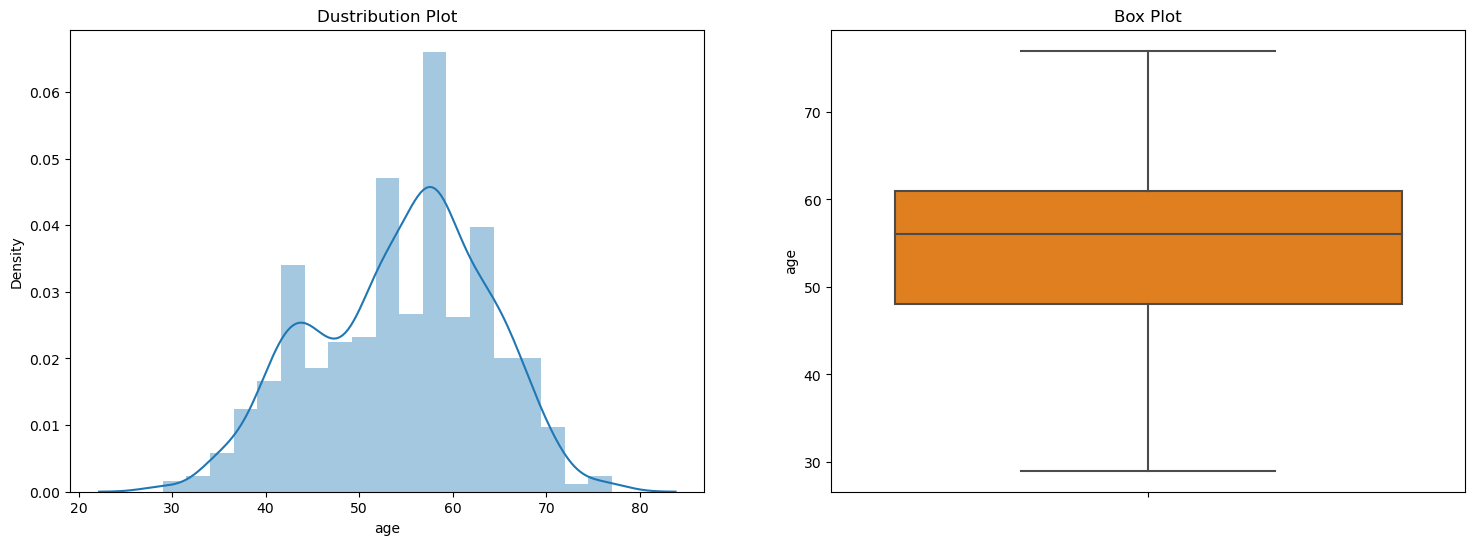

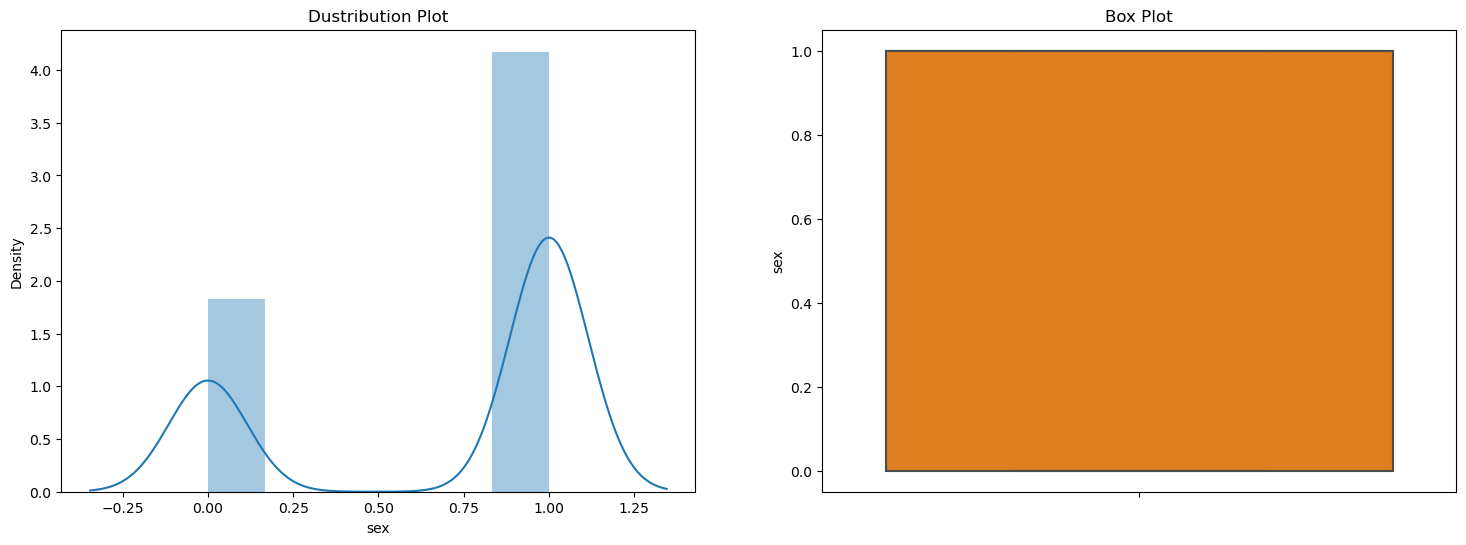

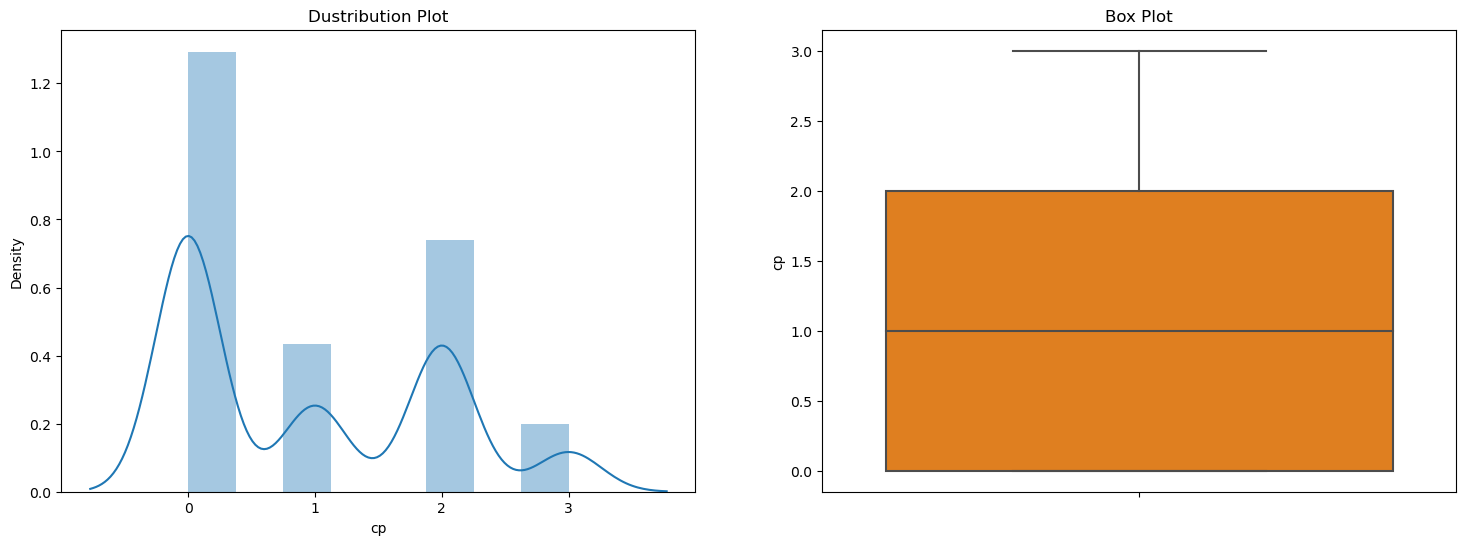

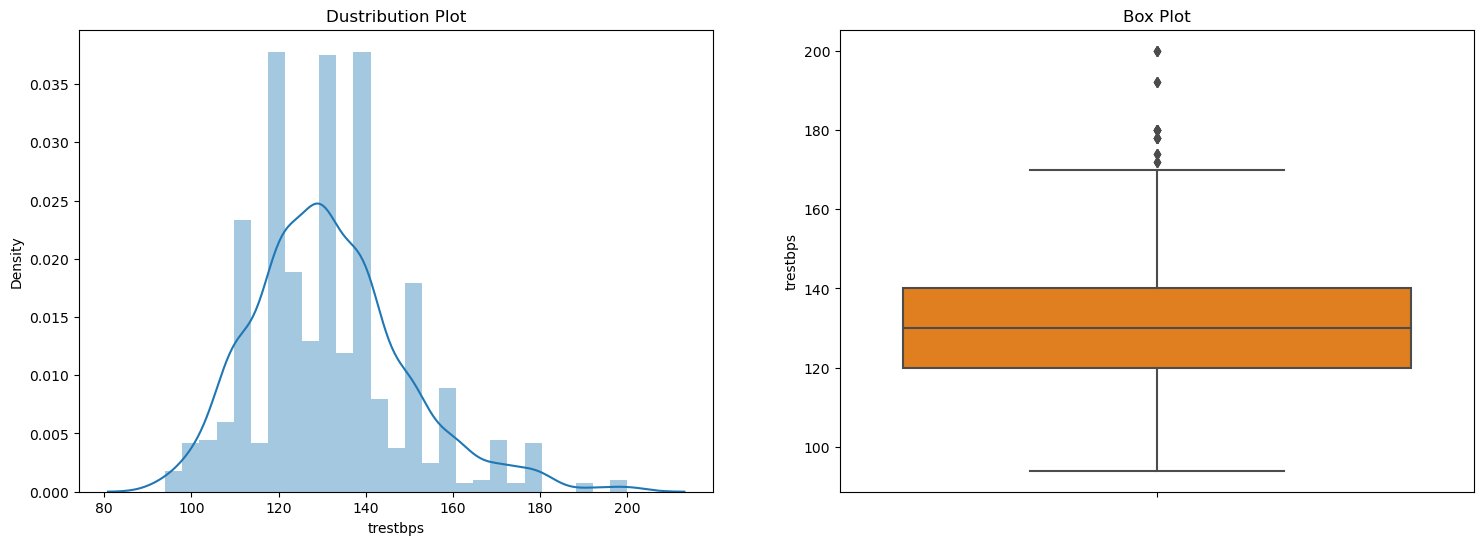

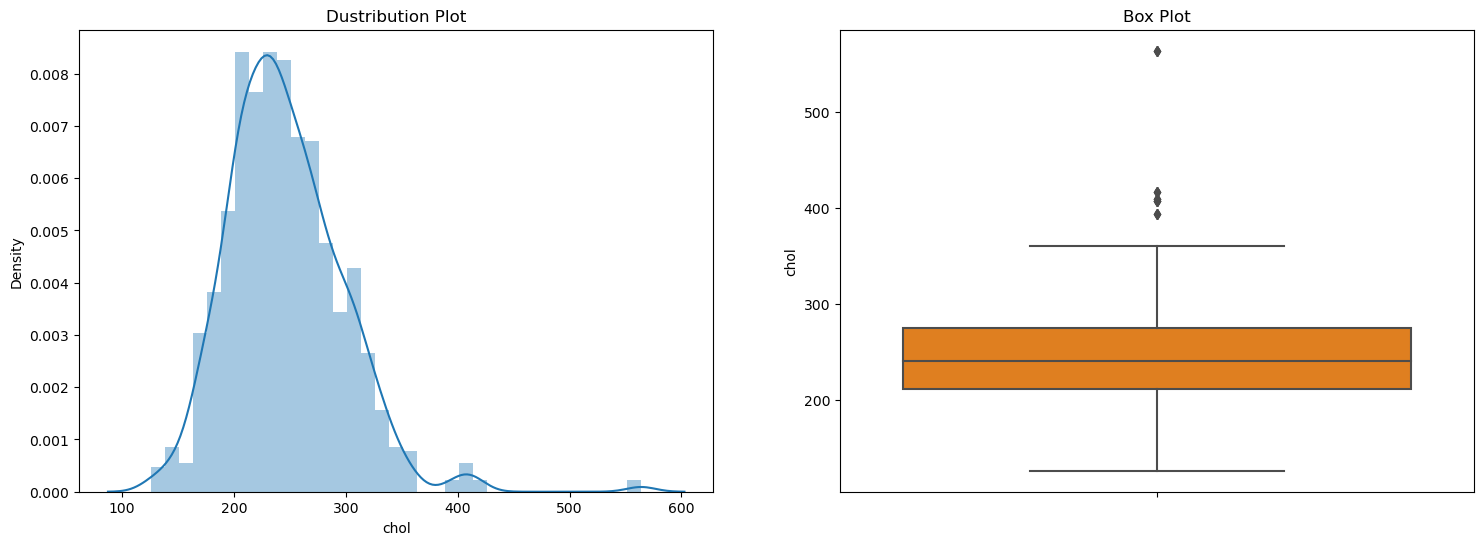

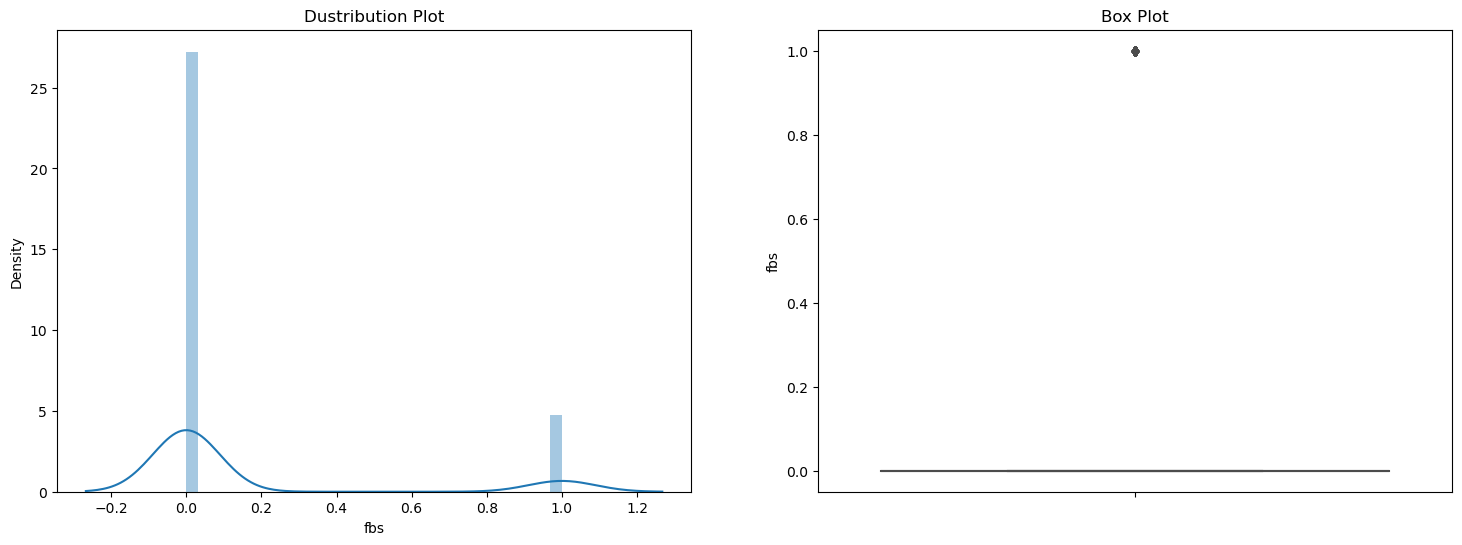

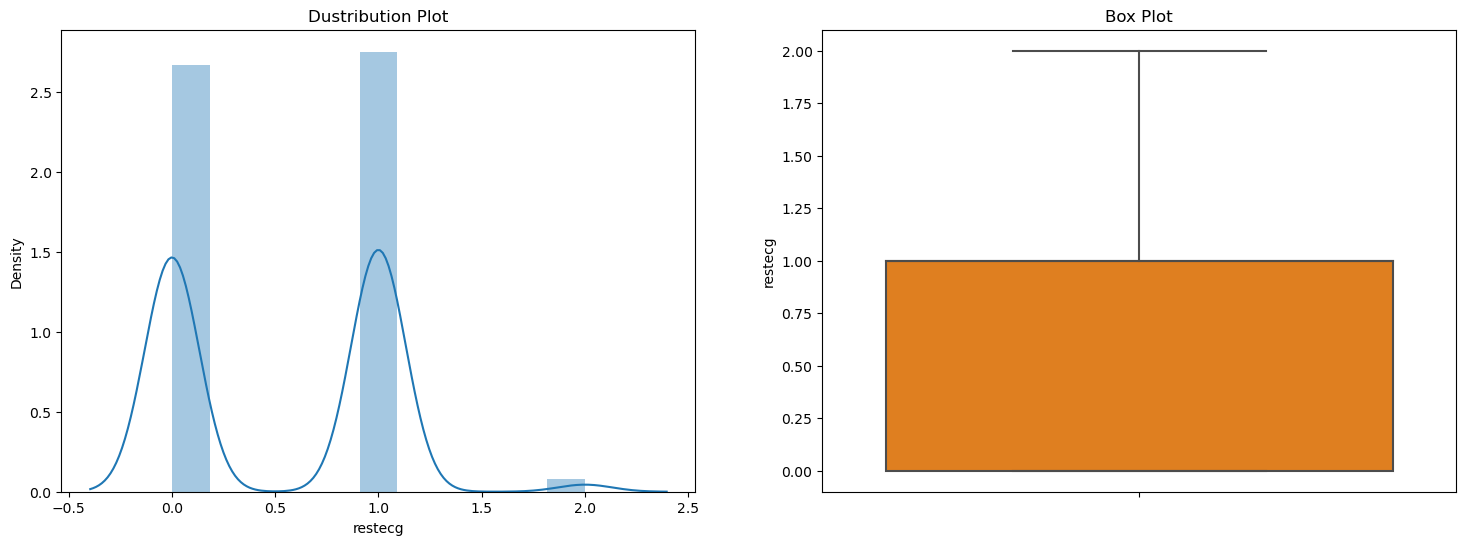

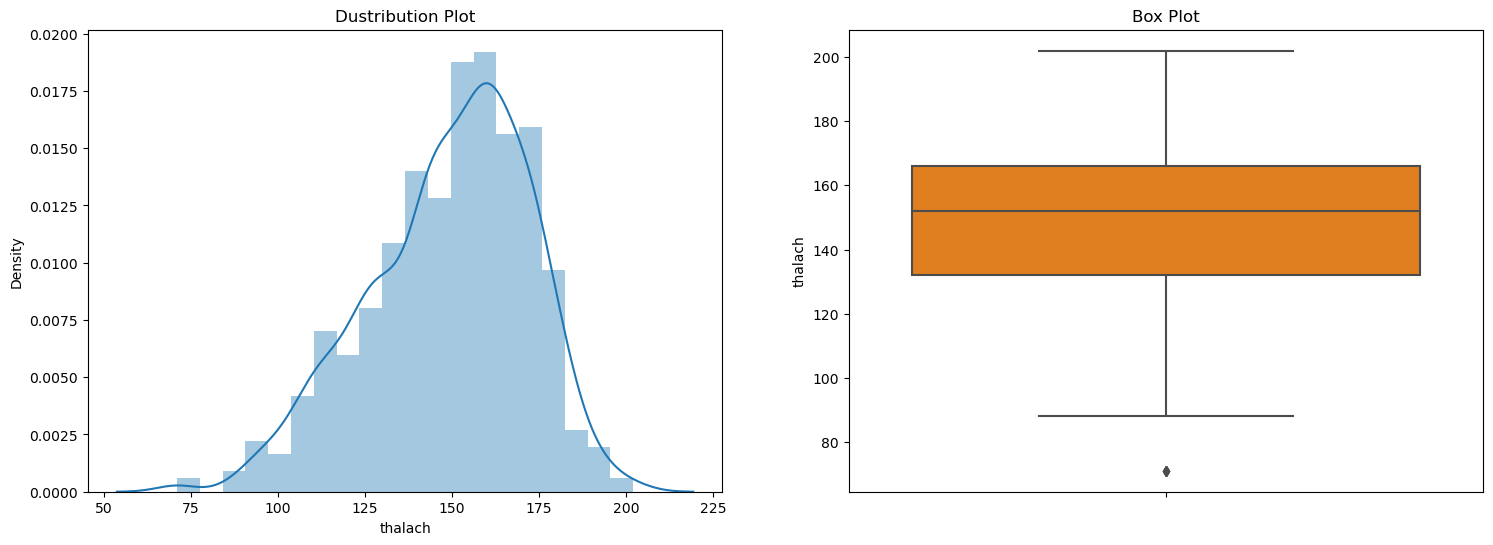

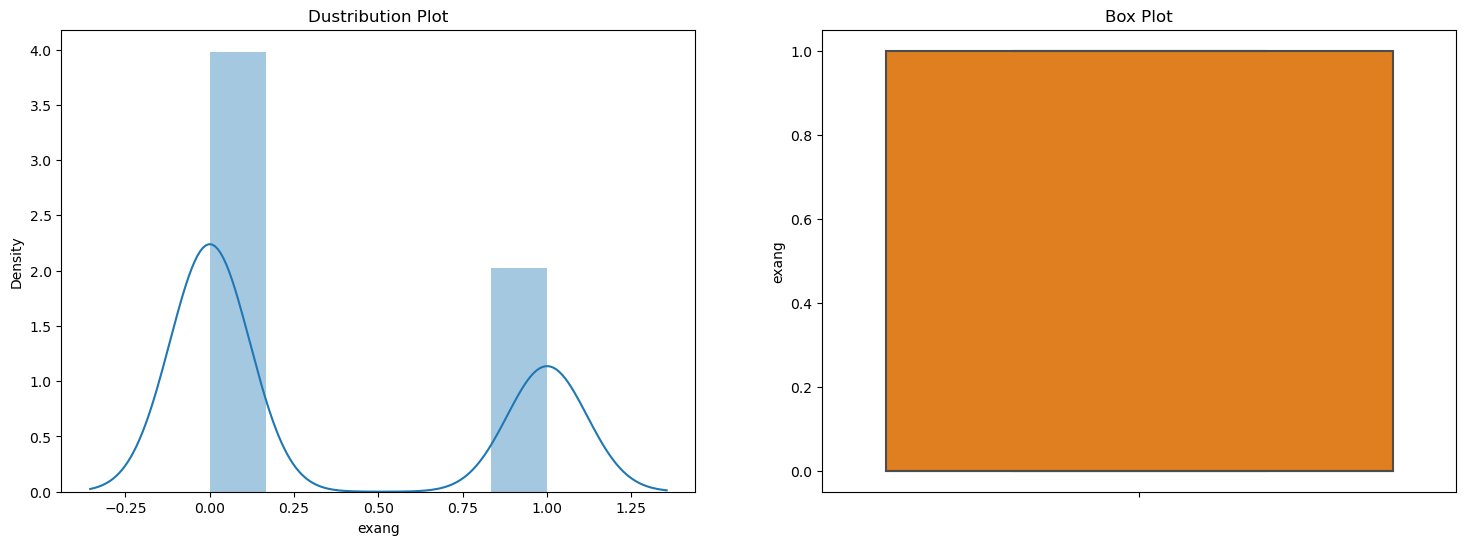

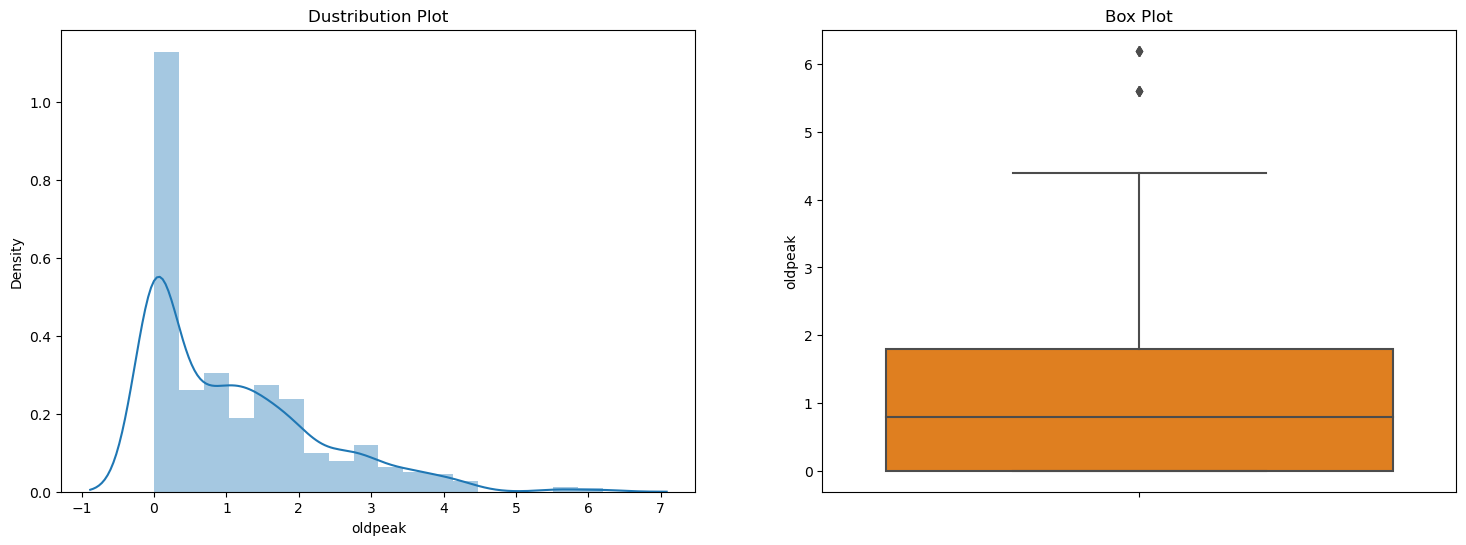

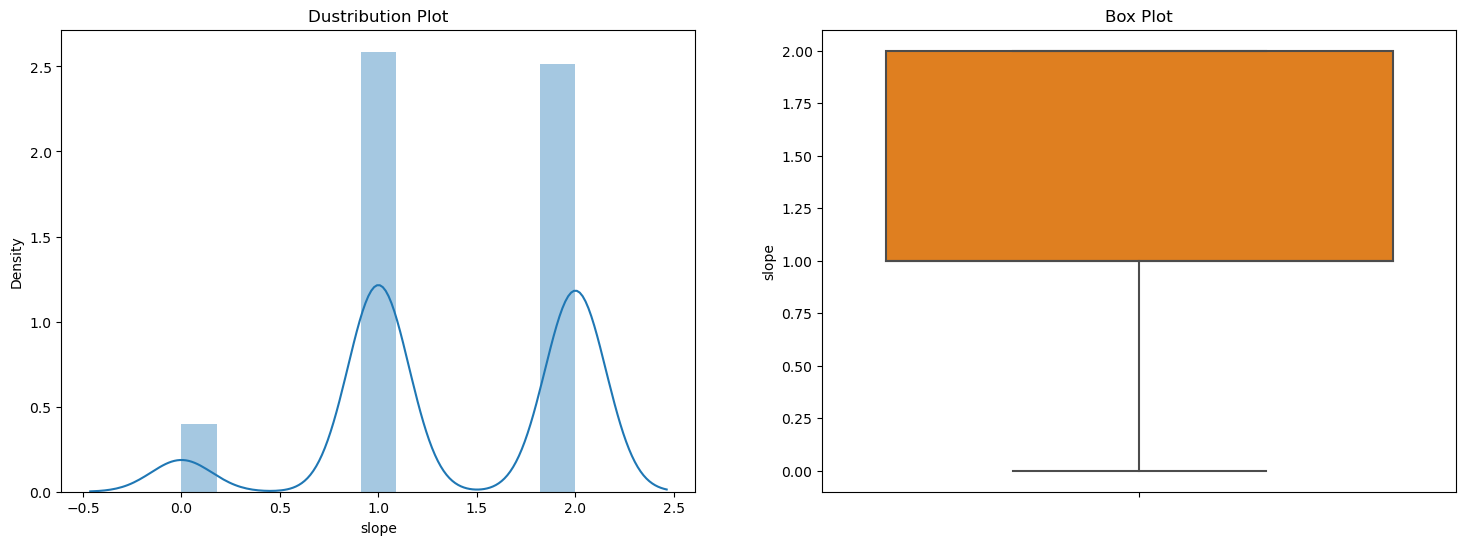

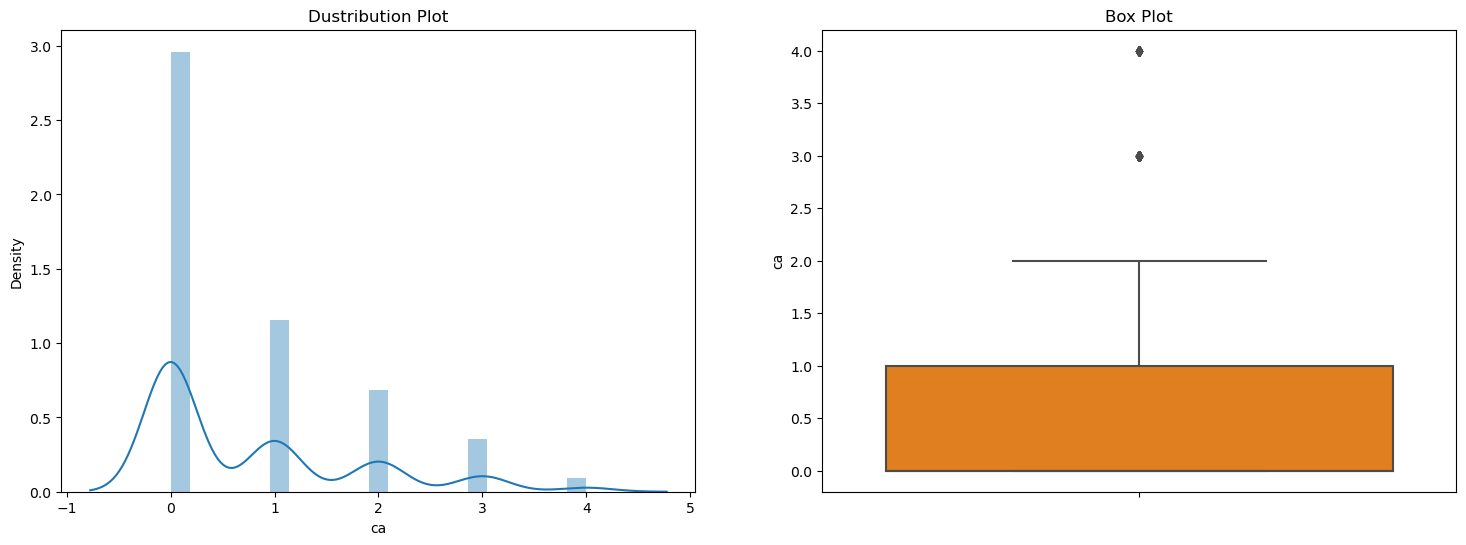

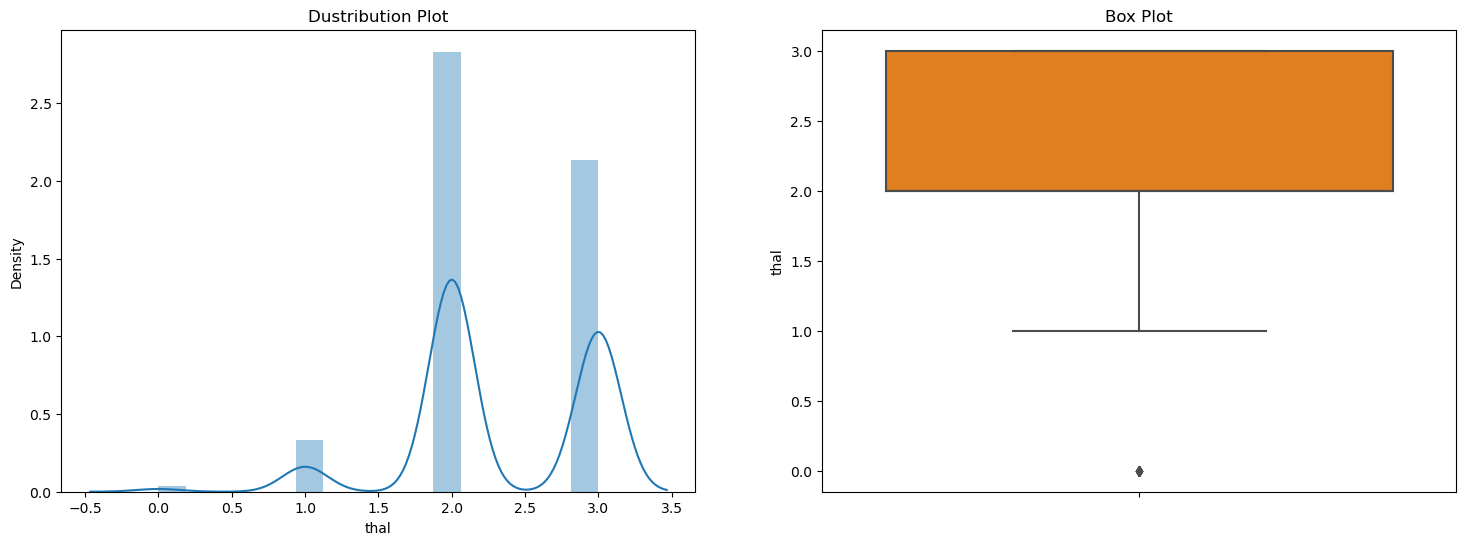

In [23]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
for feature in features:
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,2,1)
    plt.title("Dustribution Plot")
    sns.distplot(df[feature])
    
    plt.subplot(1,2,2)
    plt.title("Box Plot")
    sns.boxplot(y=df[feature], palette="Set1_r")
    
    plt.show()
    

# Bivariant Analysis
Analysing each features with target column

In [28]:
#using groupby function to find realtionship bwetween Sex and other numerical features of our dataset.
df.groupby("sex").agg(["count"])

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,count,count,count,count,count,count,count,count,count,count,count,count,count
sex,,,,,,,,,,,,,
0,312,312,312,312,312,312,312,312,312,312,312,312,312
1,713,713,713,713,713,713,713,713,713,713,713,713,713


In [29]:
# aggregate the data based on the index and values
agg_df = df.groupby(['target', "sex"]).agg("count").reset_index()

# pivot the aggregated DataFrame
agg_df.pivot(index='target', columns='sex')

age        cp      trestbps      chol       fbs       ... exang       \
sex       0    1    0    1        0    1    0    1    0    1  ...     0    1   
target                                                        ...              
0        86  413   86  413       86  413   86  413   86  413  ...    86  413   
1       226  300  226  300      226  300  226  300  226  300  ...   226  300   

       oldpeak      slope        ca      thal       
sex          0    1     0    1    0    1    0    1  
target                                              
0           86  413    86  413   86  413   86  413  
1          226  300   226  300  226  300  226  300  

[2 rows x 24 columns]

# Multivariant analysis
Analysing feature with each other

In [30]:
# Computing varation for numerical features
var = df.var()
var

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

In [31]:
#Computing Correlation for numerical Features

cor = df.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


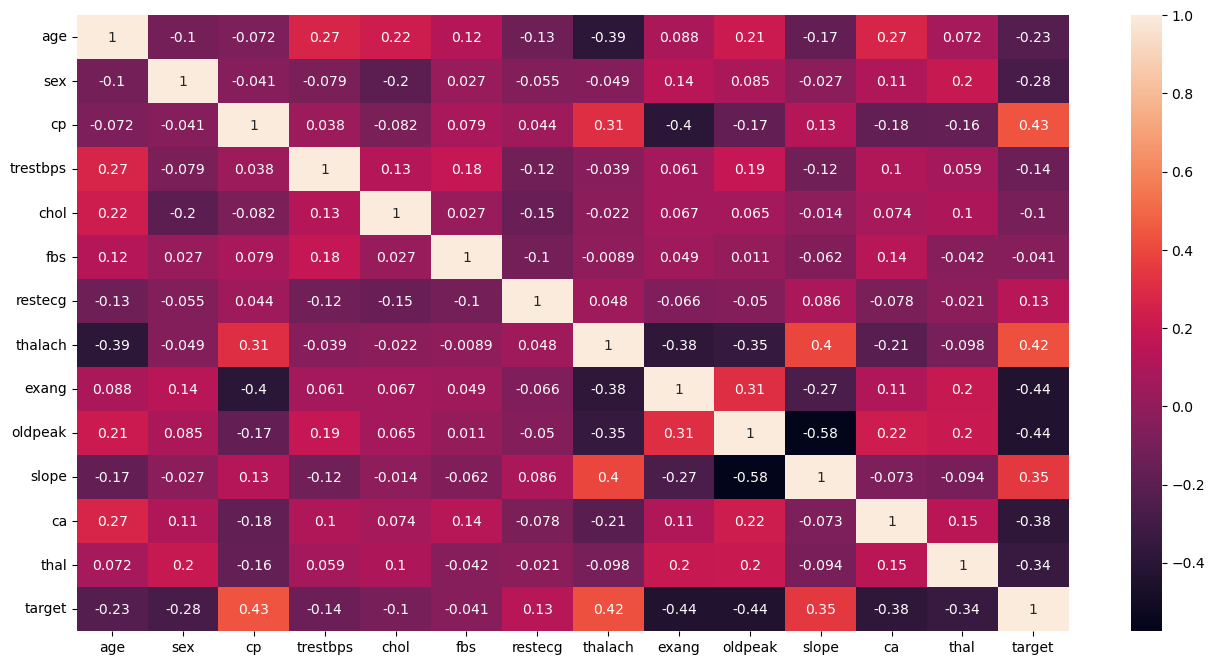

In [37]:
# Ploting HeatMap to show Correlation in Visual Form.
plt.figure(figsize=(16,8))
sns.heatmap(cor,annot=True)
plt.show()

# Model Building